In [1]:
import pandas as pd
import numpy as np
import spotipy
import SpotipyWrapper


SyntaxError: invalid syntax (SpotipyWrapper.py, line 93)

In [ ]:
help(SpotipyWrapper)

In [ ]:
wrapper = SpotipyWrapper.WrapperClass()
sp = wrapper.doAuth()

In [ ]:

playlistDF = wrapper.getUsersPlaylists('mikeydays')
playlistDF


In [ ]:
artistsDF = pd.read_csv('artist-uris.csv')
artistsDF.columns=['name', 'uri']
artistsDF['uri'] = artistsDF['uri'].apply(lambda uri: uri.split(':')[2])

artistsDF

In [ ]:
uri = playlistDF[playlistDF['name'] == 'country']['uri'].values[0]

songsDF = wrapper.getSongsFromPlaylist(uri, 'mikeydays')
songsDF

In [ ]:
len(songsDF['name'].unique())
# len(songsDF['name'])

In [ ]:
id = artistsDF.loc[artistsDF['name'] == 'DaBaby']['uri'].values[0]

sp.artist_top_tracks(id)

In [ ]:
names = []

featureList = []
acousticness = []
danceability = []
energy = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
tempo = []
valence = []
popularity = []
timeSignature = []

for index, row in songsDF.iterrows():
    uri = row['uri']
    if(not isinstance(uri, str)):
        continue
    name = row['name']
    features = sp.audio_features(uri)
    if features != [None]:
        names.append(name)
        print(name)
        acousticness.append(features[0]['acousticness'])
        danceability.append(features[0]['danceability'])
        energy.append(features[0]['energy'])
        instrumentalness.append(features[0]['instrumentalness'])
        liveness.append(features[0]['liveness'])
        loudness.append(features[0]['loudness'])
        speechiness.append(features[0]['speechiness'])
        tempo.append(features[0]['tempo'])
        valence.append(features[0]['valence'])
        timeSignature.append(features[0]['time_signature'])



        # popularity.append(features[0]['popularity'])

data = {
    'name' : names,
    'acousticness' : acousticness,
    'danceability' : danceability,
    'energy' : energy,
    'instrumentalness' : instrumentalness,
    'liveness' : liveness,
    'loudness' : loudness,
    'speechiness' : speechiness,
    'tempo' : tempo,
    'valence' : valence,
    'timeSignature' : timeSignature
    
}

audioFeaturesDF = pd.DataFrame(data)
audioFeaturesDF


In [ ]:
import os

username = 'mikeydays'
playlist = 'country'

path = './Data/{}/{}'.format(username, playlist)

if not os.path.exists(path):
    os.makedirs(path)

csvPath = os.path.join(path, 'SongFeatures.csv')    
audioFeaturesDF.to_csv(csvPath, index=False)
# audioFeaturesDF.to_csv(r'./{}/{}/SongFeatures.csv'.format('mikeydays', 'country'))

In [ ]:
audioFeaturesDF = pd.read_csv(csvPath)

In [ ]:
audioFeaturesDF.corr(method='kendall')

In [ ]:
import altair as alt

source = pd.DataFrame(audioFeaturesDF.drop(columns=['timeSignature', 'tempo', 'loudness']))
source = pd.DataFrame(source.mean(axis=0), columns=['Mean']).reset_index()
alt.Chart(source).mark_bar().encode(x='index', y='Mean')
# source

In [ ]:
import matplotlib.pyplot as plt
import math
# matplotlib.use('TkAgg')
%matplotlib inline


def create_spider(df, x, y, ax, subs, final = False):
    # Libraries
    
    # number of variable
    temp = df.drop(["name"], axis=1)
    normalized_df=temp.rank(pct = True)
    categories= list(normalized_df)
    N = len(categories)
    
    subs = subs
    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:

    ax.set_title(str(df['name'].iloc[x * subs + y][:17]) + '...', fontsize=8)
    values= normalized_df.iloc[x * subs + y].values.flatten().tolist()
    values += values[:1]
    values
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]
 
   
    
    # Draw one axe per variable + add labels
    if final:
        ax.set_title(df['name'].iloc[x * subs + y],fontsize=16)
        plt.xticks(angles[:-1], categories, color='Black', size=10)
        
    # Draw ylabels
    # ax.set_rlabel_position(0)
    # ax.set_ylim([0,1])
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    return plt


def spiders(df, subs):
    # Initialise the spider plot
    temp = df.drop(["name"], axis=1)
    normalized_df=temp.rank(pct = True)
    categories= list(normalized_df)
    N = len(categories)

    fig, axes = plt.subplots(subs, subs, subplot_kw=dict(polar=True))
    fig.suptitle("Song Feature Plots")
    fig.set_size_inches(18.5, 10.5)
    x = y = 0
    
    for axisRow in axes:
        for ax in axisRow:  
            ax.set_title(temp.iloc[x,y])    
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.yaxis.grid(False)
            ax.spines['polar'].set_visible(False)
            create_spider(df, x, y,ax, subs)
            
        
        
            y += 1  
            y = y%subs
        x += 1
        x %= subs

    plt.savefig('spiderPlots.png')
    plt.subplots_adjust(wspace = .4, hspace = .4)
    # fig.tight_layout()

    # new_ax = plt.subplot(111, polar=True)

    # create_spider(df, 0, 0, new_ax, True).show()

spiders(audioFeaturesDF[:64], 8)


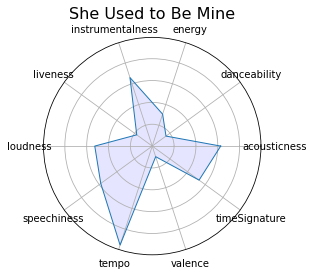

In [17]:



new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
create_spider(audioFeaturesDF[:], 5, 0, new_ax, 8, True).show()
